In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
## Let's simulate some data
N = 500
class1 = np.random.randn(N,2)
class2 = np.random.randn(N,2)+np.array([[2,2]])

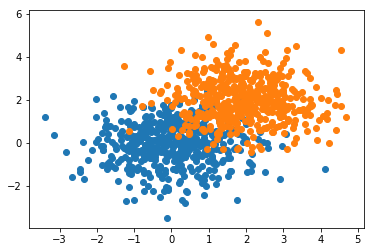

In [4]:
plt.scatter(class1[:,0],class1[:,1])
plt.scatter(class2[:,0],class2[:,1])

In [6]:
X = np.hstack((np.ones((2*N,1)),np.vstack((class1,class2))))

In [16]:
Y = np.vstack(([[1]]*N,[[0]]*N))

In [17]:
Y.shape

(1000, 1)

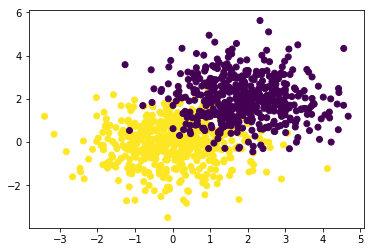

In [18]:
plt.scatter(X[:,[1]],X[:,[2]],c=Y)

In [19]:
## semi closed form solution using an approximate Y
approxY = np.abs(Y-0.01)

In [26]:
## find w using a Moore-Penrose Psuedo inverse
w = -np.linalg.inv(X.T@X)@X.T@np.log((1-approxY)/approxY)

In [27]:
def sigmoid(i):
    return 1/(1+np.exp(-i))

In [28]:
phat = sigmoid(X@w)

Text(0.5, 1.0, 'Colored by True Labels')

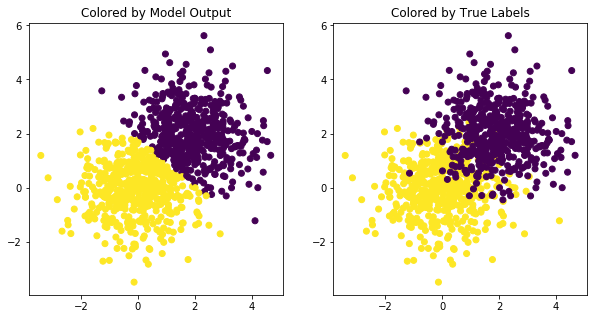

In [34]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(X[:,[1]],X[:,[2]],c=phat>0.5)
plt.title('Colored by Model Output')
plt.subplot(1,2,2)
plt.scatter(X[:,[1]],X[:,[2]],c=Y>0.5)
plt.title('Colored by True Labels')

Area Under the Curve: 0.8625963999999643


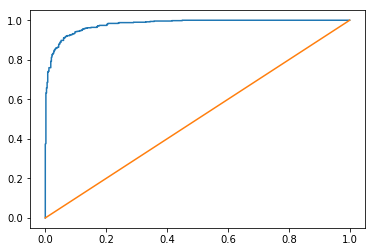

In [51]:
### Plot the ROC and get the AUC

TPR = []
FPR = []
Area = 0
stepsize = 0.0001
for t in np.arange(1,-stepsize,-stepsize):
    Yhat = sigmoid(X@w)>t
    TPR.append((Yhat*Y).sum()/Y.sum())
    FPR.append((Yhat*(1-Y)).sum()/(1-Y).sum())
    Area+=TPR[-1]*stepsize
    
plt.plot(FPR,TPR)
plt.plot(list(range(2)),list(range(2)))
print("Area Under the Curve: {}".format(Area))